In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from imutils import paths
import seaborn as sns
import random
import time
from datetime import datetime
import sklearn
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

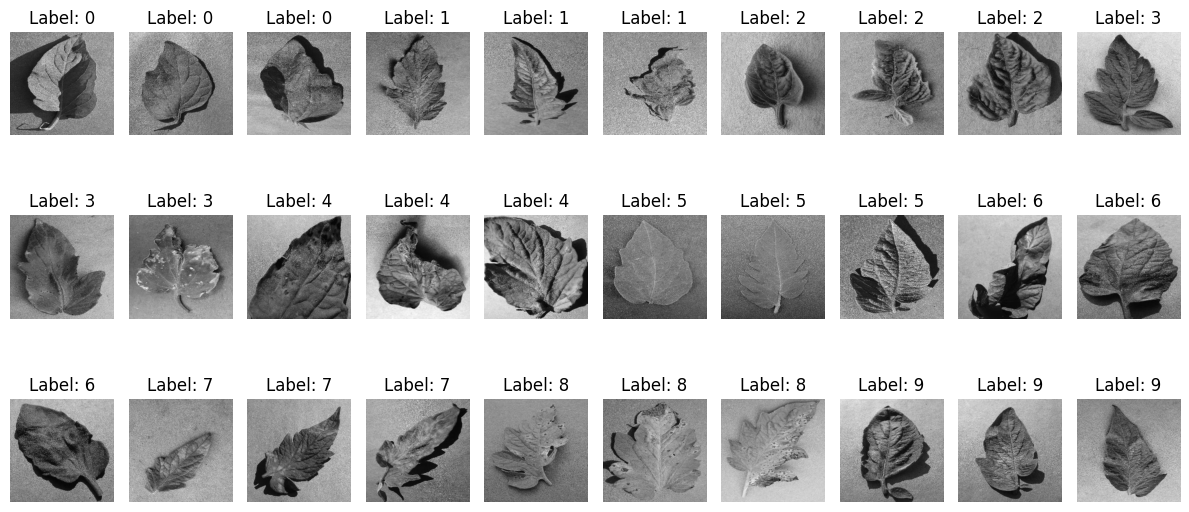

In [8]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split


# Create a dictionary that maps each label to a unique integer value
directories = {
    "Tomato__Target_Spot": 0,
    "Tomato__Tomato_mosaic_virus": 1,
    "Tomato__Tomato_YellowLeaf__Curl_Virus": 2,
    "Tomato_Bacterial_spot": 3,
    "Tomato_Early_blight": 4,
    "Tomato_healthy": 5,
    "Tomato_Late_blight": 6,
    "Tomato_Leaf_Mold": 7,
    "Tomato_Septoria_leaf_spot": 8,
    "Tomato_Spider_mites_Two_spotted_spider_mite": 9
}

# Initialize lists to store the images and labels
images_to_print = []
labels_to_print = []

# Define the number of images to print per class
num_images_to_print = 3

# Loop through the directories and load images
for directory, label in directories.items():
    images = []
    for filename in os.listdir(directory):
        if filename.endswith('.JPG') or filename.endswith('.png'):
            # Load the image
            filepath = os.path.join(directory, filename)
            image = cv2.imread(filepath)

            # Convert the image to grayscale
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Append the image and label to the lists
            images.append(image)
            labels_to_print.append(label)

            # Break if the desired number of images to print is reached
            if len(images) == num_images_to_print:
                break

    # Append the images to the overall list
    images_to_print.extend(images)

# Convert the lists to numpy arrays
images_to_print = np.array(images_to_print)
labels_to_print = np.array(labels_to_print)

# Display the images
plt.figure(figsize=(12, 6))
for i in range(len(images_to_print)):
    plt.subplot(num_images_to_print, len(directories), i + 1)
    plt.imshow(images_to_print[i], cmap='gray')
    plt.title(f"Label: {labels_to_print[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [6]:


# Initialize lists to store the training and testing data and labels
train_images = []
train_labels = []
test_images = []
test_labels = []

for directory, label in directories.items():
    images = []
    for filename in os.listdir(directory):
        if filename.endswith('.JPG') or filename.endswith('.png'):
            # Load the image
            filepath = os.path.join(directory, filename)
            image = cv2.imread(filepath)

            # Convert the image to grayscale
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Apply histogram equalization if the image is in grayscale format
            if len(image.shape) == 2:
                image = cv2.equalizeHist(image)

            # Normalize the pixel values to be between 0 and 1
            image = image / 255.0

            # Resize the image to 32x32
            image = cv2.resize(image, (32, 32))

            # Append the image to the list of images for this directory
            images.append(image)
           

    # Split the images into train and test sets
    train_images_dir, test_images_dir, train_labels_dir, test_labels_dir = train_test_split(images, [label]*len(images), test_size=0.2, random_state=0)

    # Append the images and labels to the overall train and test sets
    train_images += train_images_dir
    test_images += test_images_dir
    train_labels += train_labels_dir
    test_labels += test_labels_dir


# Convert the lists to numpy arrays
train_images = np.array(train_images).astype('float32')
train_labels = np.array(train_labels).astype('int')
test_images = np.array(test_images).astype('float32')
test_labels = np.array(test_labels).astype('int')



print(f"Training data: {len(train_images)} images")
print(f"Testing data: {len(test_images)} images")

Training data: 12681 images
Testing data: 3176 images


TypeError: object of type 'int' has no len()

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
data1 = {"C:/Users/noelm/OneDrive/Desktop/Internship/PlantVillage/Tomato__Target_Spot",
               "C:/Users/noelm/OneDrive/Desktop/Internship/PlantVillage/Tomato__Tomato_mosaic_virus",
               "C:/Users/noelm/OneDrive/Desktop/Internship/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus",
               "C:/Users/noelm/OneDrive/Desktop/Internship/PlantVillage/Tomato_Bacterial_spot",
               "C:/Users/noelm/OneDrive/Desktop/Internship/PlantVillage/Tomato_Early_blight",
               "C:/Users/noelm/OneDrive/Desktop/Internship/PlantVillage/Tomato_healthy",
               "C:/Users/noelm/OneDrive/Desktop/Internship/PlantVillage/Tomato_Late_blight",
               "C:/Users/noelm/OneDrive/Desktop/Internship/PlantVillage/Tomato_Leaf_Mold",
               "C:/Users/noelm/OneDrive/Desktop/Internship/PlantVillage/Tomato_Septoria_leaf_spot",
               "C:/Users/noelm/OneDrive/Desktop/Internship/PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite"
               }

In [ ]:
import os

# List of directories to limit the number of images
directories = [
    "C:/Users/noelm/OneDrive/Desktop/Internship/Code/train/Tomato__Target_Spot",
    "C:/Users/noelm/OneDrive/Desktop/Internship/Code/train/Tomato__Tomato_mosaic_virus",
    "C:/Users/noelm/OneDrive/Desktop/Internship/Code/train/Tomato__Tomato_YellowLeaf__Curl_Virus",
    "C:/Users/noelm/OneDrive/Desktop/Internship/Code/train/Tomato_Bacterial_spot",
    "C:/Users/noelm/OneDrive/Desktop/Internship/Code/train/Tomato_Early_blight",
    "C:/Users/noelm/OneDrive/Desktop/Internship/Code/train/Tomato_healthy",
    "C:/Users/noelm/OneDrive/Desktop/Internship/Code/train/Tomato_Late_blight",
    "C:/Users/noelm/OneDrive/Desktop/Internship/Code/train/Tomato_Leaf_Mold",
    "C:/Users/noelm/OneDrive/Desktop/Internship/Code/train/Tomato_Septoria_leaf_spot",
    "C:/Users/noelm/OneDrive/Desktop/Internship/Code/train/Tomato_Spider_mites_Two_spotted_spider_mite"]

# Maximum number of images to keep in each directory
max_images = 200

for directory in directories:
    # Get the list of image files in the directory
    images = os.listdir(directory)
    # Check if the number of images is greater than the maximum limit
    if len(images) > max_images:
        # Sort the list of images alphabetically
        images.sort()
        # Determine the number of images to delete
        num_to_delete = len(images) - max_images
        # Loop over the images to delete
        for i in range(num_to_delete):
            # Construct the full file path for the image to delete
            image_path = os.path.join(directory, images[i])
            # Delete the image file
            os.remove(image_path)
            print(f"Deleted image: {image_path}")
    else:
        print(f"No images deleted in {directory}.")


Deleted image: C:/Users/noelm/OneDrive/Desktop/Internship/Code/train/Tomato__Target_Spot\002213fb-b620-4593-b9ac-6a6cc119b100___Com.G_TgS_FL 8360.JPG
Deleted image: C:/Users/noelm/OneDrive/Desktop/Internship/Code/train/Tomato__Target_Spot\003a5321-0430-42dd-a38d-30ac4563f4ba___Com.G_TgS_FL 8121.JPG
Deleted image: C:/Users/noelm/OneDrive/Desktop/Internship/Code/train/Tomato__Target_Spot\0044d10f-7062-4655-8abd-9fffc5b2f152___Com.G_TgS_FL 7908.JPG
Deleted image: C:/Users/noelm/OneDrive/Desktop/Internship/Code/train/Tomato__Target_Spot\007ec913-8cfe-43ed-b458-f041a17266ae___Com.G_TgS_FL 9844.JPG
Deleted image: C:/Users/noelm/OneDrive/Desktop/Internship/Code/train/Tomato__Target_Spot\00854623-ba28-446d-a1d5-03c0ae3f99d9___Com.G_TgS_FL 7949.JPG
Deleted image: C:/Users/noelm/OneDrive/Desktop/Internship/Code/train/Tomato__Target_Spot\0118c27a-f34a-41e1-8b2f-d2c564f83c5c___Com.G_TgS_FL 0013.JPG
Deleted image: C:/Users/noelm/OneDrive/Desktop/Internship/Code/train/Tomato__Target_Spot\0118ed61-b1

In [ ]:
import os

# List of directories to limit the number of images
directories = [
    "C:/Users/noelm/OneDrive/Desktop/Internship/Code/val/Tomato__Target_Spot",
    "C:/Users/noelm/OneDrive/Desktop/Internship/Code/val/Tomato__Tomato_mosaic_virus",
    "C:/Users/noelm/OneDrive/Desktop/Internship/Code/val/Tomato__Tomato_YellowLeaf__Curl_Virus",
    "C:/Users/noelm/OneDrive/Desktop/Internship/Code/val/Tomato_Bacterial_spot",
    "C:/Users/noelm/OneDrive/Desktop/Internship/Code/val/Tomato_Early_blight",
    "C:/Users/noelm/OneDrive/Desktop/Internship/Code/val/Tomato_healthy",
    "C:/Users/noelm/OneDrive/Desktop/Internship/Code/val/Tomato_Late_blight",
    "C:/Users/noelm/OneDrive/Desktop/Internship/Code/val/Tomato_Leaf_Mold",
    "C:/Users/noelm/OneDrive/Desktop/Internship/Code/val/Tomato_Septoria_leaf_spot",
    "C:/Users/noelm/OneDrive/Desktop/Internship/Code/val/Tomato_Spider_mites_Two_spotted_spider_mite"]

# Maximum number of images to keep in each directory
max_images = 100

for directory in directories:
    # Get the list of image files in the directory
    images = os.listdir(directory)
    # Check if the number of images is greater than the maximum limit
    if len(images) > max_images:
        # Sort the list of images alphabetically
        images.sort()
        # Determine the number of images to delete
        num_to_delete = len(images) - max_images
        # Loop over the images to delete
        for i in range(num_to_delete):
            # Construct the full file path for the image to delete
            image_path = os.path.join(directory, images[i])
            # Delete the image file
            os.remove(image_path)
            print(f"Deleted image: {image_path}")
    else:
        print(f"No images deleted in {directory}.")


Deleted image: C:/Users/noelm/OneDrive/Desktop/Internship/Code/val/Tomato__Target_Spot\002213fb-b620-4593-b9ac-6a6cc119b100___Com.G_TgS_FL 8360.JPG
Deleted image: C:/Users/noelm/OneDrive/Desktop/Internship/Code/val/Tomato__Target_Spot\003a5321-0430-42dd-a38d-30ac4563f4ba___Com.G_TgS_FL 8121.JPG
Deleted image: C:/Users/noelm/OneDrive/Desktop/Internship/Code/val/Tomato__Target_Spot\0044d10f-7062-4655-8abd-9fffc5b2f152___Com.G_TgS_FL 7908.JPG
Deleted image: C:/Users/noelm/OneDrive/Desktop/Internship/Code/val/Tomato__Target_Spot\007ec913-8cfe-43ed-b458-f041a17266ae___Com.G_TgS_FL 9844.JPG
Deleted image: C:/Users/noelm/OneDrive/Desktop/Internship/Code/val/Tomato__Target_Spot\0118c27a-f34a-41e1-8b2f-d2c564f83c5c___Com.G_TgS_FL 0013.JPG
Deleted image: C:/Users/noelm/OneDrive/Desktop/Internship/Code/val/Tomato__Target_Spot\0118ed61-b135-45be-ad81-7e2d54203be4___Com.G_TgS_FL 8241.JPG
Deleted image: C:/Users/noelm/OneDrive/Desktop/Internship/Code/val/Tomato__Target_Spot\0197df47-a9cb-4b6c-b72c-a

In [ ]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="val", target_size=(224,224))

Found 1999 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [ ]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=10, activation="softmax"))

In [ ]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=5, verbose=5, mode='auto')

hist = model.fit(
    traindata,
    validation_data=testdata,
    epochs=10,
    callbacks=[checkpoint, early]
)

Epoch 1/10
63/63 [==============================] - 2308s 37s/step - loss: 2.3051 - accuracy: 0.0890 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
18/63 [=======>......................] - ETA: 29:08 - loss: 2.3029 - accuracy: 0.0955

KeyboardInterrupt: 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
# Reshape the input images
num_pixels = train_images.shape[1] * train_images.shape[2]  # calculate the total number of pixels in each image
train_images_2d = train_images.reshape(train_images.shape[0], num_pixels)  # reshape the train images
test_images_2d = test_images.reshape(test_images.shape[0], num_pixels)  # reshape the test images

# Create the k-NN model with k=9
knn = KNeighborsClassifier(n_neighbors=2)

# Train the model using the training data
knn.fit(train_images_2d, train_labels)

# Make predictions on the training and testing data
train_preds = knn.predict(train_images_2d)
test_preds = knn.predict(test_images_2d)

# Calculate the accuracy scores for the training and testing data
train_acc = (train_preds == train_labels).mean()
test_acc = (test_preds == test_labels).mean()

# Print the accuracy scores
print(f"Training accuracy: {train_acc:.4f}")
print(f"Testing accuracy: {test_acc:.4f}")


Training accuracy: 0.7456
Testing accuracy: 0.4962


In [ ]:
from sklearn.model_selection import cross_val_score

# Create a kNN model with k=9
knn = KNeighborsClassifier(n_neighbors=9)

# Reshape the input images
num_pixels = train_images.shape[1] * train_images.shape[2]
train_images_2d = train_images.reshape(train_images.shape[0], num_pixels)
test_images_2d = test_images.reshape(test_images.shape[0], num_pixels)

# Perform 10-fold cross-validation
scores = cross_val_score(knn, train_images_2d, train_labels, cv=20)

# Print the cross-validation scores
print(f"Cross-validation scores: {scores}")
print(f"Mean accuracy: {scores.mean():.4f}")
print(f"Standard deviation: {scores.std():.4f}")


Cross-validation scores: [0.49812734 0.46441948 0.4494382  0.4494382  0.43445693 0.47940075
 0.52059925 0.45318352 0.4494382  0.47191011 0.4494382  0.4494382
 0.46067416 0.45318352 0.47940075 0.46816479 0.47565543 0.5093633
 0.5037594  0.5037594 ]
Mean accuracy: 0.4712
Standard deviation: 0.0239


In [ ]:
import sklearn
from skimage.color import rgb2gray

# Convert the input images to grayscale
train_images_gray = rgb2gray(train_images)
test_images_gray = rgb2gray(test_images)

# Create the k-NN model with k=9
knn = KNeighborsClassifier(n_neighbors=9)

# Train the model using the training data
knn.fit(train_images_gray, train_labels)

# Make predictions on the training and testing data
train_preds = knn.predict(train_images_gray)
test_preds = knn.predict(test_images_gray)

# Calculate the accuracy scores for the training and testing data
train_acc = (train_preds == train_labels).mean()
test_acc = (test_preds == test_labels).mean()

# Print the accuracy scores
print(f"Training accuracy: {train_acc:.4f}")
print(f"Testing accuracy: {test_acc:.4f}")

# Plot the sample images and their predicted labels
sample_images_gray = rgb2gray(sample_images)
sample_preds = knn.predict(sample_images_gray)

# Plot the sample images and their predicted labels
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
    ax.imshow(sample_images_gray[i], cmap="gray")
    ax.set_title(label_names[sample_preds[i]])
    ax.axis("off")
    
plt.tight_layout()
plt.show()


ValueError: the input array must have size 3 along `channel_axis`, got (11096, 32, 32)

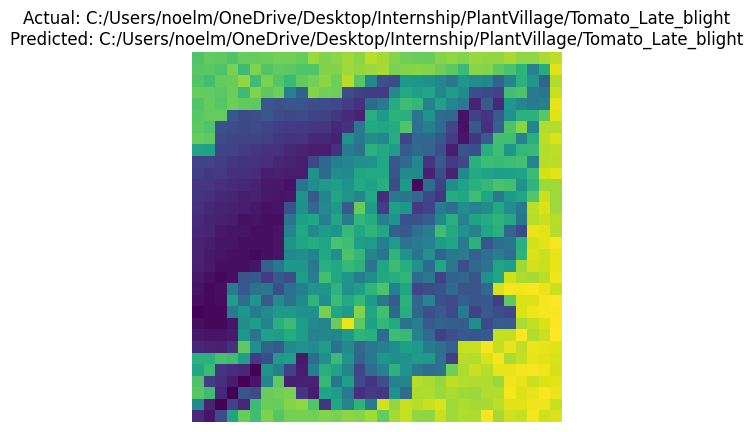

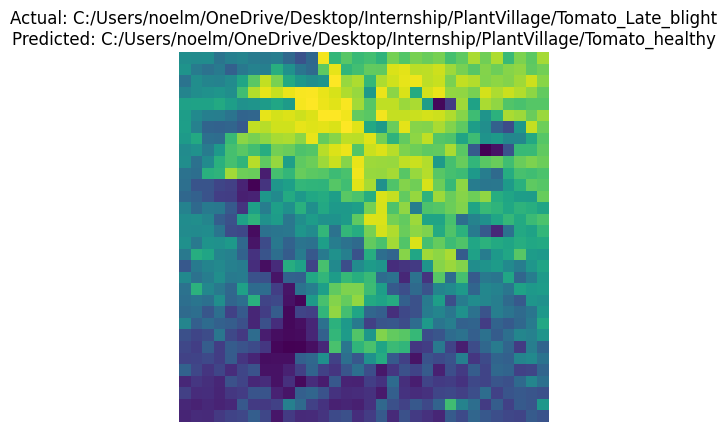

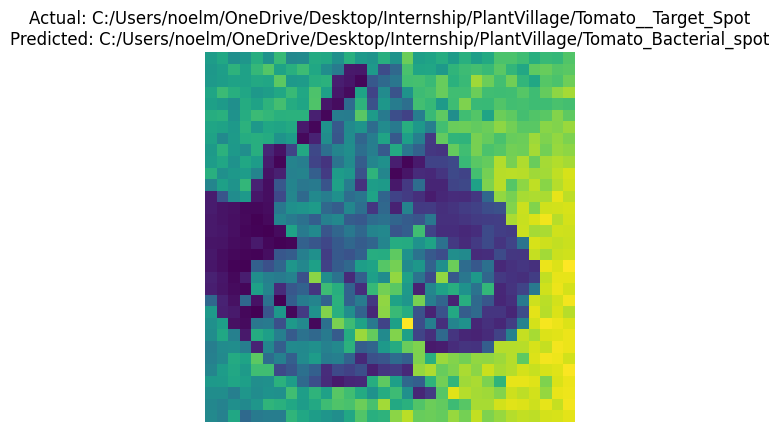

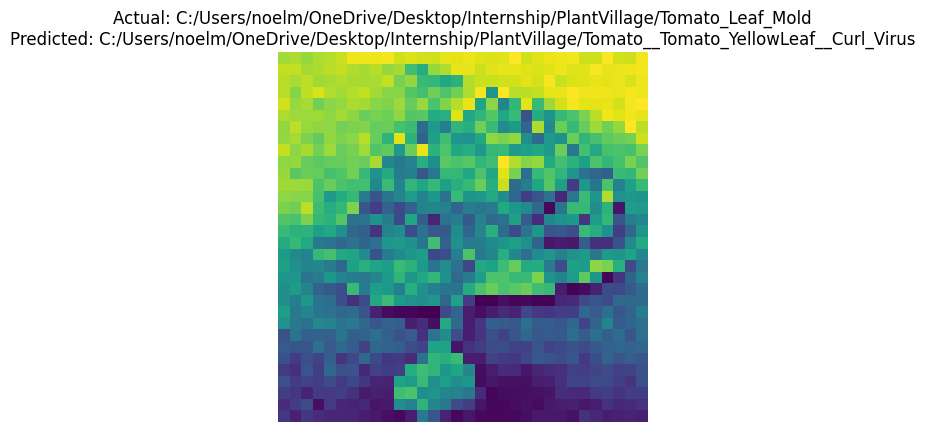

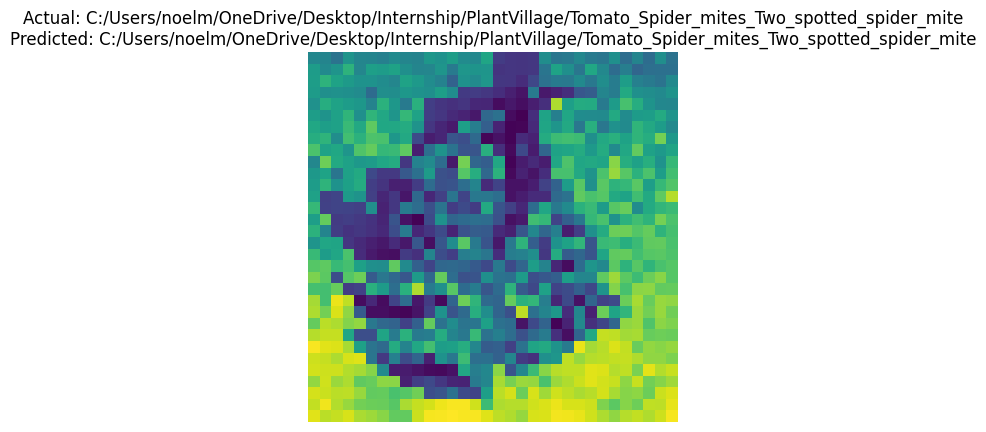

In [ ]:
# Make predictions on the test images

test_preds = knn.predict(test_images_flat)

# Convert the labels back to their original text format
label_to_dir = {v: k for k, v in directories.items()}
test_labels_text = [label_to_dir[i] for i in test_labels]
test_preds_text = [label_to_dir[i] for i in test_preds]

# Define the function to plot the actual and predicted labels for a single image

def plot_actual_predicted_image(image, actual_label, predicted_label):
    plt.imshow(image)
    plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
    plt.axis('off')
    plt.show()

# Plot the actual and predicted labels for a random subset of test images
num_images = 5
random_indices = random.sample(range(len(test_images)), num_images)
for i in random_indices:
    plot_actual_predicted_image(test_images[i], test_labels_text[i], test_preds_text[i])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Reshape the training and testing data to 1D arrays
train_images_flat = train_images.reshape((train_images.shape[0], -1))
test_images_flat = test_images.reshape((test_images.shape[0], -1))

# Define the range of k values to try
k_values = list(range(1, 9))

# Define the range of weights to try
weights = ['uniform', 'distance']

# Define the range of distance metrics to try
metrics = ['euclidean', 'chebyshev']

# Train the model using the training data for each combination of k, weight, and distance metric
best_acc = 0.0
for k in k_values:
    for weight in weights:
        for metric in metrics:
            knn = KNeighborsClassifier(n_neighbors=k, weights=weight, metric=metric)
            knn.fit(train_images_flat, train_labels)
            train_preds = knn.predict(train_images_flat)
            test_preds = knn.predict(test_images_flat)
            train_acc = accuracy_score(train_labels, train_preds)
            test_acc = accuracy_score(test_labels, test_preds) 
            print(f"k={k}, weight={weight}, metric={metric}: Training accuracy={train_acc:.4f}, Testing accuracy={test_acc:.4f}")
            if test_acc > best_acc:
                best_k = k
                best_weight = weight
                best_metric = metric
                best_acc = test_acc

print(f"Best k={best_k}, weight={best_weight}, metric={best_metric}, Testing accuracy={best_acc:.4f}")


k=1, weight=uniform, metric=euclidean: Training accuracy=1.0000, Testing accuracy=0.5060
k=1, weight=uniform, metric=chebyshev: Training accuracy=1.0000, Testing accuracy=0.2298
k=1, weight=distance, metric=euclidean: Training accuracy=1.0000, Testing accuracy=0.5060


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Reshape the images for use in a convolutional neural network
train_images = train_images.reshape(-1, 32, 32, 1)
test_images = test_images.reshape(-1, 32, 32, 1)
# Define the model architecture
model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images.reshape(-1, 32, 32, 1), train_labels, epochs=40, validation_data=(test_images.reshape(-1, 32, 32, 1), test_labels))


Epoch 1/40
126/126 [==============================] - 4s 24ms/step - loss: 2.2832 - accuracy: 0.1154 - val_loss: 2.2254 - val_accuracy: 0.2318
Epoch 2/40
126/126 [==============================] - 3s 23ms/step - loss: 2.1272 - accuracy: 0.2168 - val_loss: 2.0473 - val_accuracy: 0.2652
Epoch 3/40
126/126 [==============================] - 3s 22ms/step - loss: 1.9900 - accuracy: 0.2843 - val_loss: 1.9526 - val_accuracy: 0.3105
Epoch 4/40
126/126 [==============================] - 3s 23ms/step - loss: 1.8822 - accuracy: 0.3283 - val_loss: 1.8211 - val_accuracy: 0.3670
Epoch 5/40
126/126 [==============================] - 3s 23ms/step - loss: 1.7859 - accuracy: 0.3807 - val_loss: 1.6743 - val_accuracy: 0.4154
Epoch 6/40
126/126 [==============================] - 3s 23ms/step - loss: 1.6780 - accuracy: 0.3972 - val_loss: 1.6303 - val_accuracy: 0.4139
Epoch 7/40
126/126 [==============================] - 3s 23ms/step - loss: 1.5925 - accuracy: 0.4449 - val_loss: 1.5476 - val_accuracy: 0.4524

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Reshape the images for use in a convolutional neural network
train_images = train_images.reshape(-1, 32, 32, 1)
test_images = test_images.reshape(-1, 32, 32, 1)
# Define the model architecture
model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images.reshape(-1, 32, 32, 1), train_labels, epochs=40, validation_data=(test_images.reshape(-1, 32, 32, 1), test_labels))


Epoch 1/40
397/397 [==============================] - 11s 22ms/step - loss: 2.0374 - accuracy: 0.2733 - val_loss: 1.7568 - val_accuracy: 0.4342
Epoch 2/40
397/397 [==============================] - 9s 24ms/step - loss: 1.6432 - accuracy: 0.4430 - val_loss: 1.3883 - val_accuracy: 0.5302
Epoch 3/40
397/397 [==============================] - 8s 21ms/step - loss: 1.4211 - accuracy: 0.5179 - val_loss: 1.2713 - val_accuracy: 0.5586
Epoch 4/40
397/397 [==============================] - 8s 21ms/step - loss: 1.3162 - accuracy: 0.5519 - val_loss: 1.1836 - val_accuracy: 0.5945
Epoch 5/40
397/397 [==============================] - 8s 21ms/step - loss: 1.2402 - accuracy: 0.5783 - val_loss: 1.1190 - val_accuracy: 0.6143
Epoch 6/40
397/397 [==============================] - 9s 22ms/step - loss: 1.1894 - accuracy: 0.5921 - val_loss: 1.1098 - val_accuracy: 0.6111
Epoch 7/40
397/397 [==============================] - 9s 22ms/step - loss: 1.1486 - accuracy: 0.6087 - val_loss: 1.0298 - val_accuracy: 0.647

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)

# Print the test accuracy
print('Test accuracy:', test_acc)


100/100 [==============================] - 1s 6ms/step - loss: 0.7415 - accuracy: 0.7346
Test accuracy: 0.7345718145370483


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Reshape the images for use in a convolutional neural network
train_images = train_images.reshape(-1, 32, 32, 1)
test_images = test_images.reshape(-1, 32, 32, 1)

# Define the model architecture with additional layers and padding
model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1), padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=40, validation_data=(test_images, test_labels))


Epoch 1/40
397/397 [==============================] - 45s 109ms/step - loss: 2.1443 - accuracy: 0.2229 - val_loss: 1.9177 - val_accuracy: 0.3259
Epoch 2/40
397/397 [==============================] - 44s 110ms/step - loss: 1.6830 - accuracy: 0.4240 - val_loss: 1.5349 - val_accuracy: 0.4685
Epoch 3/40
397/397 [==============================] - 48s 120ms/step - loss: 1.4194 - accuracy: 0.5138 - val_loss: 1.4035 - val_accuracy: 0.5016
Epoch 4/40
397/397 [==============================] - 51s 128ms/step - loss: 1.2616 - accuracy: 0.5624 - val_loss: 1.2717 - val_accuracy: 0.5743
Epoch 5/40
397/397 [==============================] - 45s 113ms/step - loss: 1.1588 - accuracy: 0.6016 - val_loss: 1.0887 - val_accuracy: 0.6354
Epoch 6/40
397/397 [==============================] - 46s 115ms/step - loss: 1.0927 - accuracy: 0.6253 - val_loss: 1.1739 - val_accuracy: 0.6089
Epoch 7/40
397/397 [==============================] - 46s 116ms/step - loss: 1.0328 - accuracy: 0.6473 - val_loss: 0.9995 - val_ac

In [ ]:
train_images = train_images.reshape(-1, 32, 32, 1)
test_images = test_images.reshape(-1, 32, 32, 1)

input_shape = (32,32,1)
n_classes = 10

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation = 'relu' , input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32, kernel_size = (3,3), activation = 'relu' ),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu' ),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu' ),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu' ),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax'),
])

model.build(input_shape=input_shape)

NameError: name 'train_images' is not defined

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)

# Print the overall accuracy of the model on the test data
print('Test accuracy:', test_acc)


100/100 [==============================] - 1s 14ms/step - loss: 0.6539 - accuracy: 0.7916
Test accuracy: 0.7915617227554321


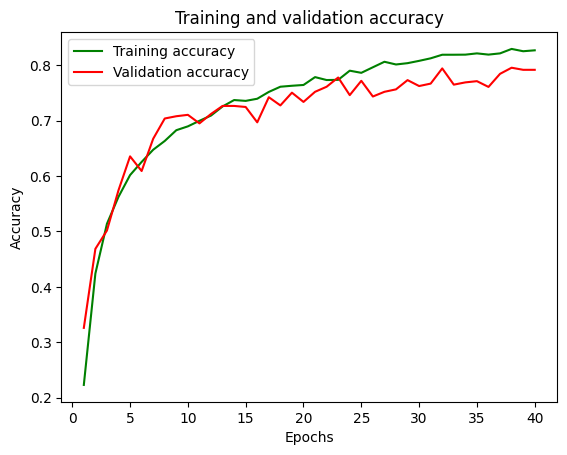

In [ ]:
import matplotlib.pyplot as plt

# Get the training and validation accuracy values from the history object
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the accuracy values with different colors
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.svm import SVC

# Reshape the images for use in a support vector machine model
train_images = train_images.reshape(-1, 32 * 32)
test_images = test_images.reshape(-1, 32 * 32)

# Define the SVM model with a radial basis function (RBF) kernel
model = SVC(kernel='rbf', gamma='scale')

# Train the model
model.fit(train_images, train_labels) 

# Evaluate the model on the test data
test_acc = model.score(test_images, test_labels)

# Print the overall accuracy of the model on the test data
print('Test accuracy:', test_acc)


Test accuracy: 0.6597353497164461


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 0.1, 1]}
grid = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=5)
grid.fit(train_images, train_labels)
print('Best hyperparameters:', grid.best_params_)
test_acc = grid.score(test_images, test_labels)
print('Test accuracy:', test_acc)


Best hyperparameters: {'C': 10, 'gamma': 'scale'}
Test accuracy: 0.6822096198277673


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': ['scale', 0.001, 0.01, 0.1, 1, 10], 'kernel': ['rbf', 'poly', 'linear']}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=10, error_score=raise)
grid.fit(train_images, train_labels)
print('Best hyperparameters:', grid.best_params_)
test_acc = grid.score(test_images, test_labels)
print('Test accuracy:', test_acc)


SyntaxError: invalid syntax (1471243675.py, line 5)